<a href="https://colab.research.google.com/github/Eddie2111/ML-practices/blob/main/EMAIL_SPAM_422_Project_G5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET https://www.kaggle.com/datasets/shantanudhakadd/email-spam-detection-dataset-classification

In [1]:
#some imported libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# 1. **Read dataset**

In [3]:
import numpy as np 
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#mail= pd.read_csv('/content/spam.csv', encoding='latin-1')
mail= pd.read_csv('/content/spam2.csv', encoding='latin-1')
mail.head(1600)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
1595,ham,Pls confirm the time to collect the cheque.,NaN,NaN,NaN
1596,spam,As a Registered Subscriber yr draw 4 a å£100 g...,NaN,NaN,NaN
1597,spam,URGENT! Your Mobile number has been awarded wi...,NaN,NaN,NaN
1598,ham,Daddy will take good care of you :),NaN,NaN,NaN


# **2. PRE-PROCESSING**

# i) Handel missing values

In [4]:
mail.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)
mail.shape

(5572, 2)

In [5]:
mail.isnull().sum()

v1    0
v2    0
dtype: int64

# ii) Handel  duplicate value

In [6]:
mail.duplicated().sum()

403

In [7]:
#drop duplicates if any
mail=mail.drop_duplicates()
mail.shape
mail.duplicated().sum()

0

In [8]:
mail.shape

(5169, 2)

#  iii) Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
mail['v1'] = enc.fit_transform(mail['v1'])
print(mail[['v1']].head())
print("ham = 0 and spam = 1")

   v1
0   0
1   0
2   1
3   0
4   0
ham = 0 and spam = 1


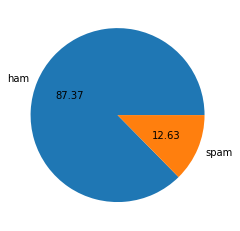

In [10]:
import matplotlib.pyplot as plt
plt.pie(mail['v1'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

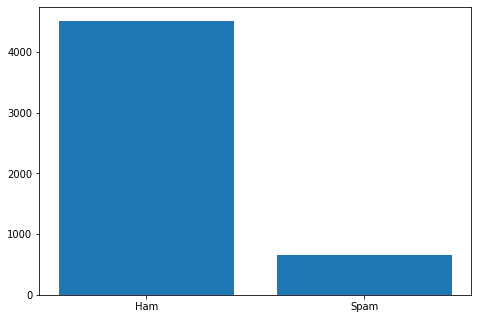

In [11]:
C,D=mail['v1'].value_counts()
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tag=['Ham', 'Spam']
num=[C,D]
ax.bar(tag,num)
plt.show()

In [12]:
print("Number of Ham",C, "\nNumber of Spam",D)

Number of Ham 4516 
Number of Spam 653


In [13]:
mail.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# iv) Filtering Text Data

In [ ]:
#def tokenize(column):
  #tokens = nltk.word_tokenize(column)
  #return [w for w in tokens if w.isalpha()]    

In [14]:
import nltk
#nltk.download('punkt');
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


#string
mail['v2'].dropna(inplace=True)
mail['v2'] = mail['v2'].astype(str)

#case handel
mail['v2'] = mail['v2'].str.lower()

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
mail['v2'] = mail['v2'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# special char
mail = mail.replace(r'[^\w\s]|_', '', regex=True)

#tokenized
#mail['v2'] = mail.apply(lambda x: tokenize(x['v2']), axis=1)

#stemming
#mail['stemmed'] = mail['tokenized'].apply(lambda x: [stemmer.stem(y) for y in x])
#mail= mail.drop(columns=['tokenized']) 
#mail.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# v) Feature Extraction

In [15]:

from sklearn.feature_extraction.text import CountVectorizer
count= CountVectorizer()
 
x=count.fit_transform(mail['v2']).toarray()
y=mail['v1']
x.shape

(5169, 9488)

# vi) Split the dataset 

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)

A=x_train.shape[0]
B=x_test.shape[0]

x_train.shape,x_test.shape

((4135, 9488), (1034, 9488))

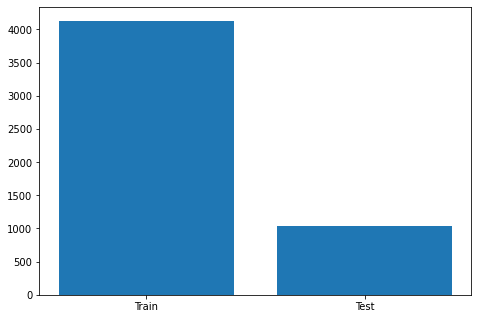

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
tag=['Train', 'Test']
num=[A,B]
ax.bar(tag,num)
plt.show()

In [ ]:
import seaborn as sn
#sns.displot(mail['v2'])


# **3. MODEL TRAINING (CLASSIFIER)**

**Training Mode---1)  SVC**

In [18]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(kernel='linear')

**Training Mode---2) Naive Bayes**

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

**Training Mode---3) Logistic Regression**

In [20]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train, y_train)


LogisticRegression(solver='liblinear')

# **4. ACCURACY** [for every classifier]

---



**SVC ACCURACY**

In [21]:
a=svc.score(x_train, y_train)*100
b=svc.score(x_test, y_test)*100

In [22]:
print("Training accuracy of the model: ",a,"%")
print("Testing accuracy of the model: ",b,"%")

Training accuracy of the model:  100.0 %
Testing accuracy of the model:  97.77562862669245 %


[0 0 0 ... 0 0 0]
[[882  20]
 [  3 129]]


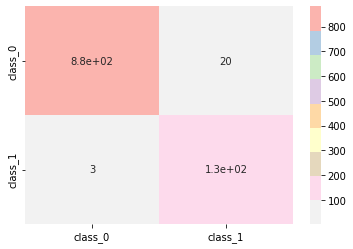

In [23]:
predictions = svc.predict(x_test)
print(predictions)
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1'], yticklabels=['class_0' ,'class_1'], annot=True)

**NAIVE BAYES ACCURACY**

In [24]:
print("Training accuracy of the model is {:.2f}".format(gnb.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(gnb.score(x_test, y_test)))

Training accuracy of the model is 0.96
Testing accuracy of the model is 0.90


In [25]:
predictions = gnb.predict(x_test)
print(predictions)

[0 0 0 ... 0 0 1]


In [26]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[801  17]
 [ 84 132]]


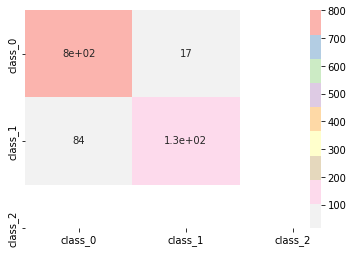

In [27]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], 
        yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

**LOGISTIC REGRESSION ACCURACY**

In [28]:
print("Training accuracy of the model is {:.2f}".format(LR.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(LR.score(x_test, y_test)))


Training accuracy of the model is 1.00
Testing accuracy of the model is 0.97


# **REFERENCES**

1. Hassan, Muhammad Ali & Mtetwa, Nhamoinesu. (2018). Feature Extraction and Classification of Spam Emails. 93-98. 10.1109/ISCMI.2018.8703222. 
https://www.researchgate.net/publication/332823881_Feature_Extraction_and_Classification_of_Spam_Emails
2. for logistic
https://eudl.eu/pdf/10.4108/eai.27-2-2020.2303291






